In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
file = "players_22.csv"
df = pd.read_csv(file)
df.head(5)

C:\Users\ishan\AppData\Local\Temp\ipykernel_26300\192223480.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [7]:
df.columns


Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [9]:
df.select_dtypes(include='number')

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,...,37,38,43,48,6,10,5,15,13,NaN
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,...,47,37,44,47,11,12,6,8,10,NaN
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,...,36,38,44,48,8,6,7,10,6,NaN
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,...,47,10,14,11,7,10,7,14,15,NaN


In [11]:
df.shape


(19239, 110)

In [13]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

# Descritive Statistics & Regression Analysis

In [18]:
df.describe()


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


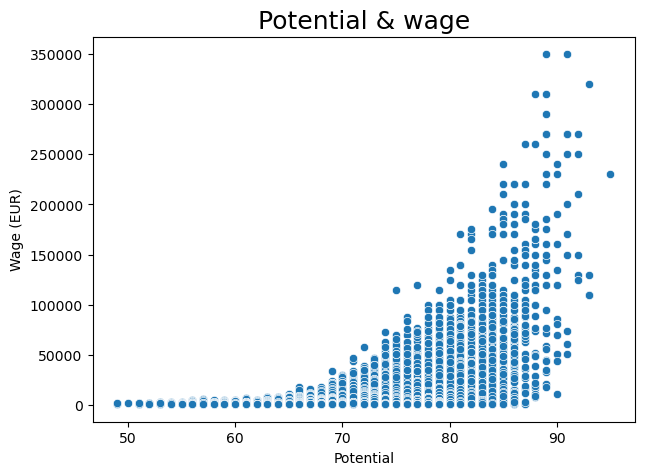

In [26]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'])
plt.xlabel("Potential") 
plt.ylabel("Wage (EUR)")
plt.title("Potential & wage", fontsize = 18)
plt.show()

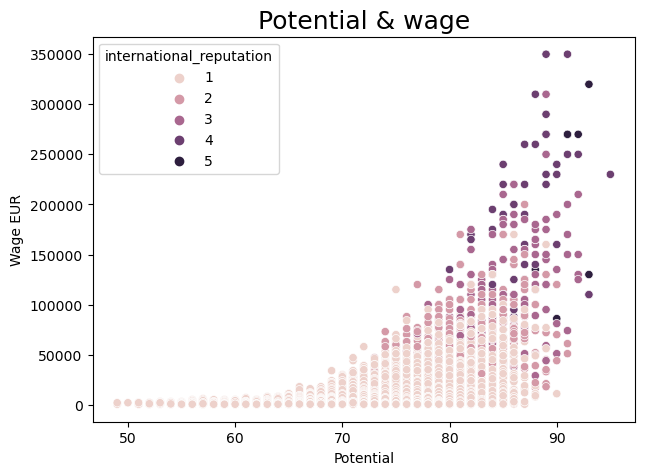

In [24]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

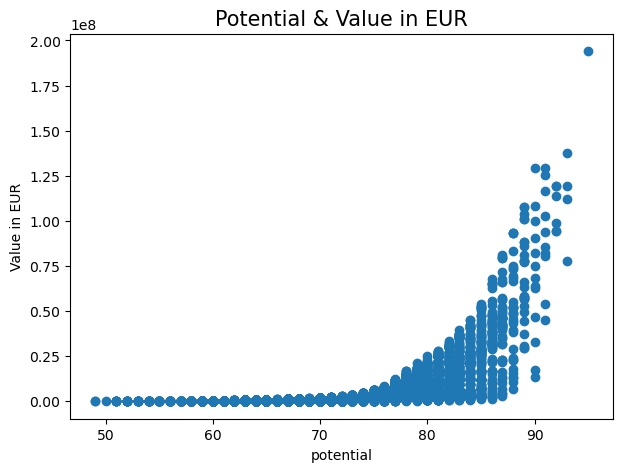

In [28]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("potential") 
plt.ylabel("Value in EUR")
plt.title("Potential & Value in EUR", fontsize = 15)
plt.show()

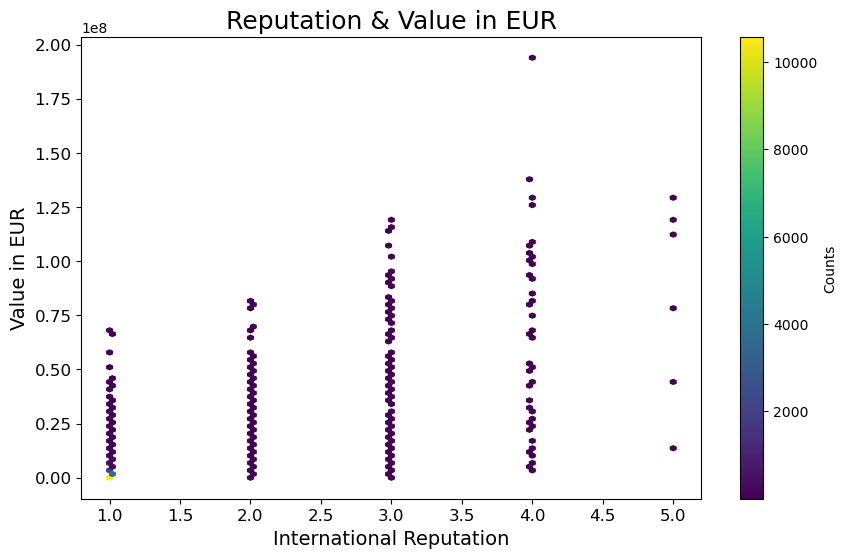

In [58]:
import matplotlib.pyplot as plt

# Create the hexbin plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate hexbin plot
hb = ax.hexbin(df['international_reputation'], df['value_eur'], gridsize=100, cmap='viridis', mincnt=1)

# Add color bar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts')

# Customize the plot
plt.xlabel("International Reputation", fontsize=14)
plt.ylabel("Value in EUR", fontsize=14)
plt.title("Reputation & Value in EUR", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


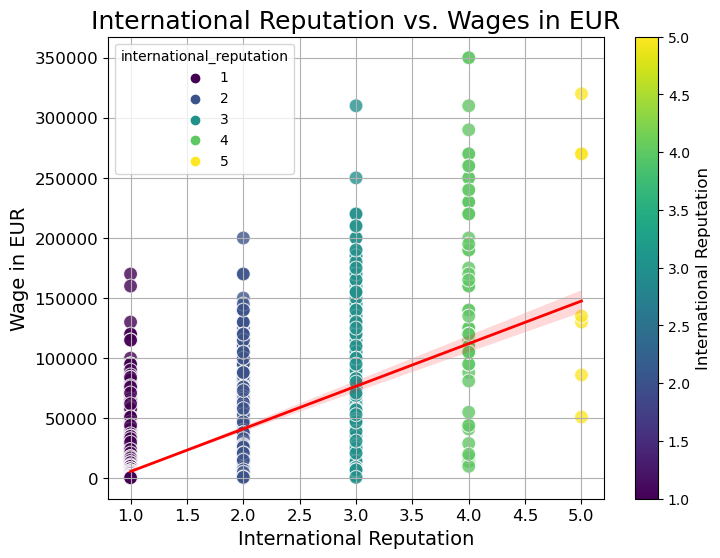

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improve the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))  # Slightly larger size for better visibility

# Create the scatter plot with a regression line
sns.scatterplot(x=df['international_reputation'], y=df['wage_eur'], ax=ax, s=100, hue=df['international_reputation'], palette='viridis', edgecolor='w', alpha=0.8)

# Add a regression line
sns.regplot(x=df['international_reputation'], y=df['wage_eur'], ax=ax, scatter=False, color='r', line_kws={"linewidth":2})

# Customize the plot
plt.xlabel("International Reputation", fontsize=14)
plt.ylabel("Wage in EUR", fontsize=14)
plt.title("International Reputation vs. Wages in EUR", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Add a color bar to show the range of the hue
norm = plt.Normalize(df['international_reputation'].min(), df['international_reputation'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('International Reputation', fontsize=12)

# Show the plot
plt.show()


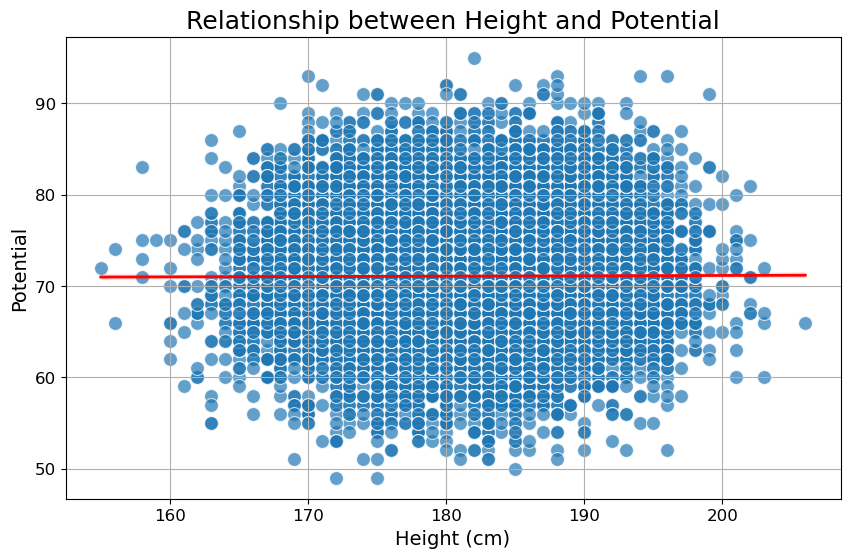

In [38]:
# Improve the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))  # Slightly bigger size for better visibility

# Create the scatter plot with regression line
sns.scatterplot(x=df['height_cm'], y=df['potential'], ax=ax, s=100, edgecolor='w', alpha=0.7)
sns.regplot(x=df['height_cm'], y=df['potential'], ax=ax, scatter=False, color='r', line_kws={"linewidth":2})

# Customize the plot
plt.xlabel("Height (cm)", fontsize=14)
plt.ylabel("Potential", fontsize=14)
plt.title("Relationship between Height and Potential", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [36]:
top_15 = df.nlargest(15, 'overall')
top_15.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


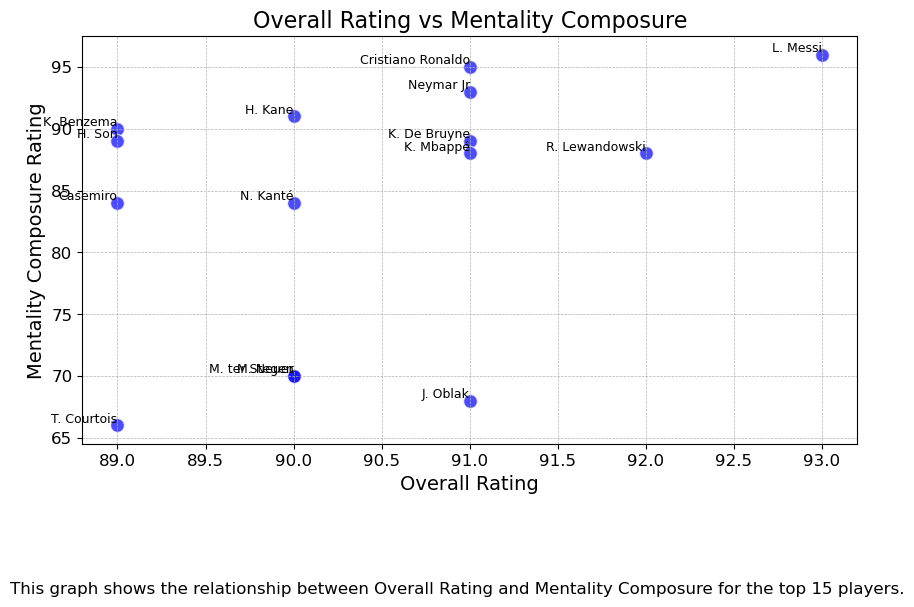

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
plt.scatter(top_15['overall'], top_15['mentality_composure'], s=100, color='blue', alpha=0.7, edgecolor='w')

# Automate labeling for all points
for i in range(len(top_15)):
    plt.text(top_15.iloc[i]['overall'], top_15.iloc[i]['mentality_composure'], 
             top_15.iloc[i]['short_name'], fontsize=9, ha='right', va='bottom')

# Customize the plot
ax.set_title("Overall Rating vs Mentality Composure", fontsize=16)
ax.set_ylabel('Mentality Composure Rating', fontsize=14)
ax.set_xlabel('Overall Rating', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a line of text below the graph
plt.figtext(0.5, -0.05, "This graph shows the relationship between Overall Rating and Mentality Composure for the top 15 players.", 
            wrap=True, horizontalalignment='center', fontsize=12)

# Adjust layout to make room for the text
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


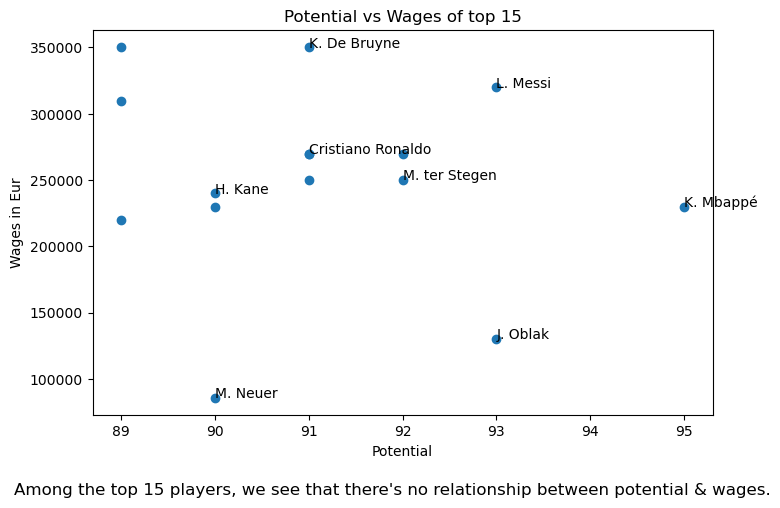

In [72]:
fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_15['potential'], top_15['wage_eur'] )
plt.text(top_15.iloc[0]['potential'], top_15.iloc[0]['wage_eur'], top_15.iloc[0]['short_name'])
# plt.text(top_15.iloc[1]['potential'], top_15.iloc[1]['wage_eur'], top_15.iloc[1]['short_name']) for better view
plt.text(top_15.iloc[2]['potential'], top_15.iloc[2]['wage_eur'], top_15.iloc[2]['short_name'])
# plt.text(top_15.iloc[3]['potential'], top_15.iloc[3]['wage_eur'], top_15.iloc[3]['short_name'])
plt.text(top_15.iloc[4]['potential'], top_15.iloc[4]['wage_eur'], top_15.iloc[4]['short_name'])
plt.text(top_15.iloc[5]['potential'], top_15.iloc[5]['wage_eur'], top_15.iloc[5]['short_name'])
plt.text(top_15.iloc[6]['potential'], top_15.iloc[6]['wage_eur'], top_15.iloc[6]['short_name'])
plt.text(top_15.iloc[7]['potential'], top_15.iloc[7]['wage_eur'], top_15.iloc[7]['short_name'])
plt.text(top_15.iloc[8]['potential'], top_15.iloc[8]['wage_eur'], top_15.iloc[8]['short_name'])
plt.text(top_15.iloc[9]['potential'], top_15.iloc[9]['wage_eur'], top_15.iloc[9]['short_name'])

ax.set_title("Potential vs Wages of top 15")
ax.set_ylabel('Wages in Eur')
ax.set_xlabel('Potential')

plt.figtext(0.5, -0.05, "Among the top 15 players, we see that there's no relationship between potential & wages.", 
            wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

# Additional Insights & Data Visualization

In [75]:
df.groupby("work_rate")["wage_eur"].max()

work_rate
High/High        350000.0
High/Low         270000.0
High/Medium      290000.0
Low/High         140000.0
Low/Low          130000.0
Low/Medium       125000.0
Medium/High      230000.0
Medium/Low       320000.0
Medium/Medium    350000.0
Name: wage_eur, dtype: float64

In [77]:
df['work_rate'].unique()

array(['Medium/Low', 'High/Medium', 'High/Low', 'High/High',
       'Medium/Medium', 'Medium/High', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

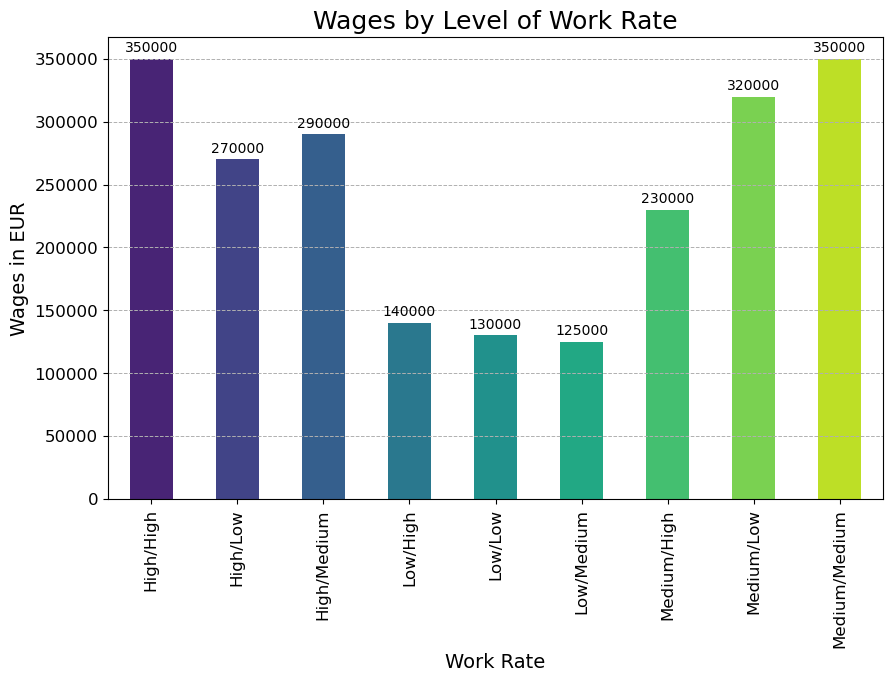

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with customized colors
bars = df.groupby("work_rate")["wage_eur"].max().plot.bar(color=sns.color_palette("viridis", len(df["work_rate"].unique())))

# Add value labels on top of the bars
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

# Customize the plot
plt.xlabel("Work Rate", fontsize=14)
plt.ylabel("Wages in EUR", fontsize=14)
plt.title("Wages by Level of Work Rate", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.show()


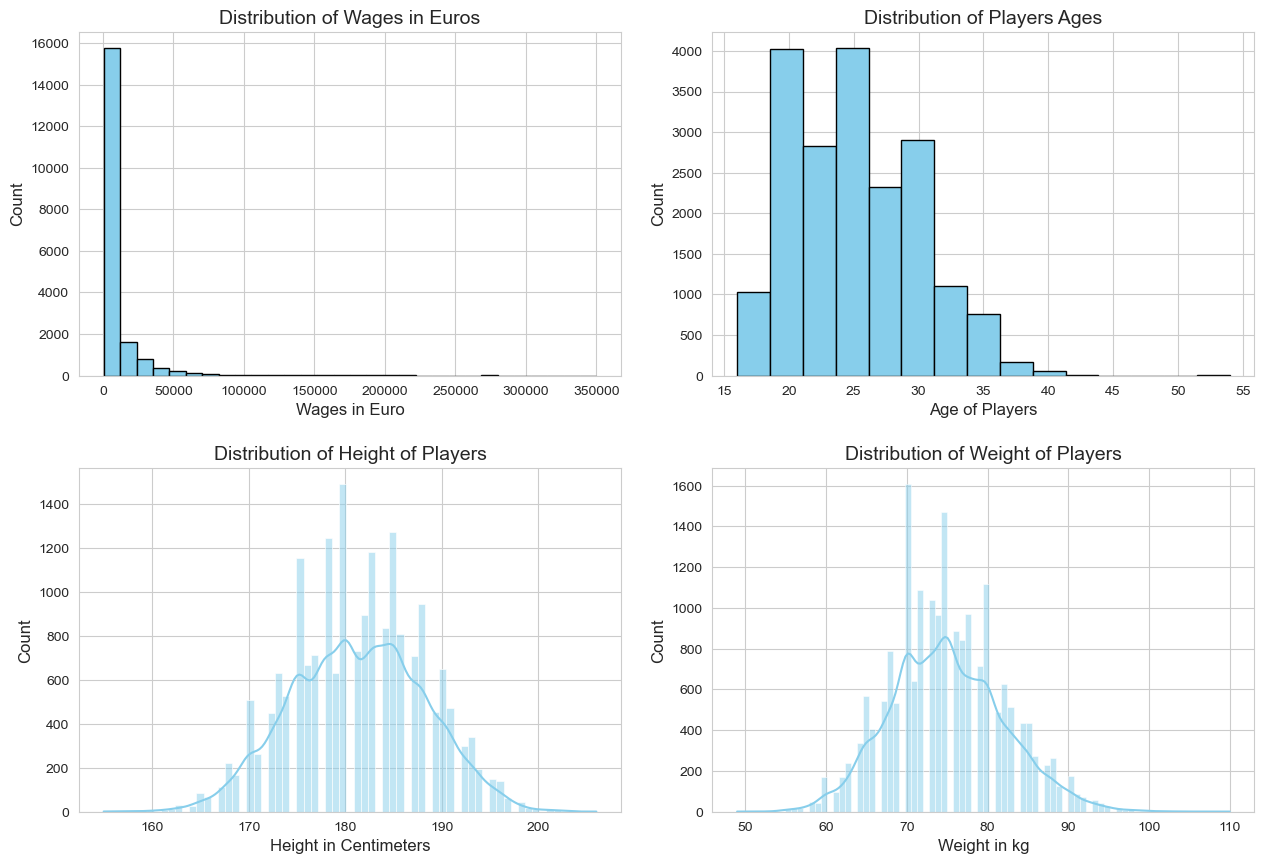

In [91]:

import warnings
# Suppress the specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set a style for the plots
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(13, 9))

# Matplotlib histogram for wages
axes[0, 0].hist(df['wage_eur'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Wages in Euro', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Distribution of Wages in Euros', fontsize=14)
axes[0, 0].grid(True)

# Matplotlib histogram for ages
axes[0, 1].hist(df['age'], bins=15, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Age of Players', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('Distribution of Players Ages', fontsize=14)
axes[0, 1].grid(True)

# Seaborn histogram for height
axes[1, 0].set_title('Distribution of Height of Players', fontsize=14)
sns.histplot(df, x='height_cm', ax=axes[1, 0], kde=True, color='skyblue')
axes[1, 0].set_xlabel('Height in Centimeters', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# Seaborn histogram for weight
axes[1, 1].set_title('Distribution of Weight of Players', fontsize=14)
sns.histplot(df, x='weight_kg', ax=axes[1, 1], kde=True, color='skyblue')
axes[1, 1].set_xlabel('Weight in kg', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout(pad=2)
plt.show()


In [113]:
df.groupby(['preferred_foot']).count()[['id']]

,id
preferred_foot,
Left,4565
Right,14674


In [115]:
df.groupby(['preferred_foot']).count().sum()[['id']]

id    19239
dtype: int64

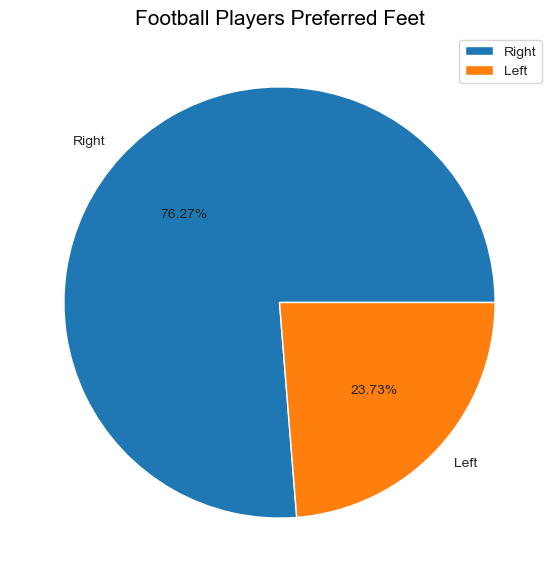

In [117]:
preferred_foot_labels = df["preferred_foot"].value_counts().index # (Right,Left) 
preferred_foot_values = df["preferred_foot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate the pie

# Visualize

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()


In [119]:
df['nationality_name'].value_counts()

nationality_name
England             1719
Germany             1214
Spain               1086
France               980
Argentina            960
                    ... 
Ethiopia               1
Papua New Guinea       1
Kyrgyzstan             1
Guam                   1
Indonesia              1
Name: count, Length: 163, dtype: int64

In [129]:
from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(5))
bar_plot


{'England': 1719,
 'Germany': 1214,
 'Spain': 1086,
 'France': 980,
 'Argentina': 960}

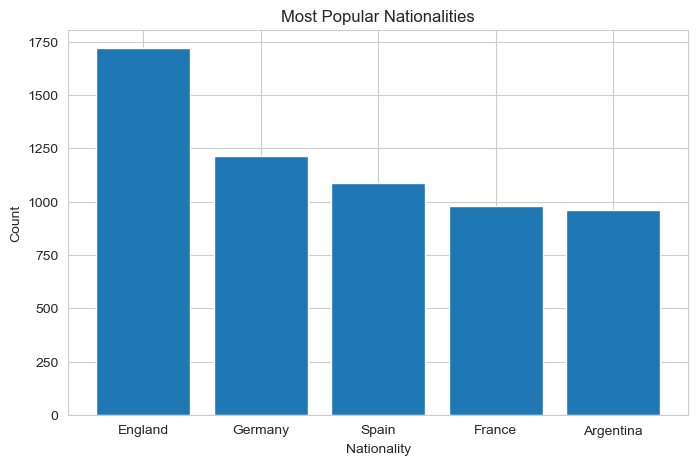

In [131]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Most Popular Nationalities')
ax.set_xlabel('Nationality')
ax.set_ylabel('Count')
plt.show()

In [135]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

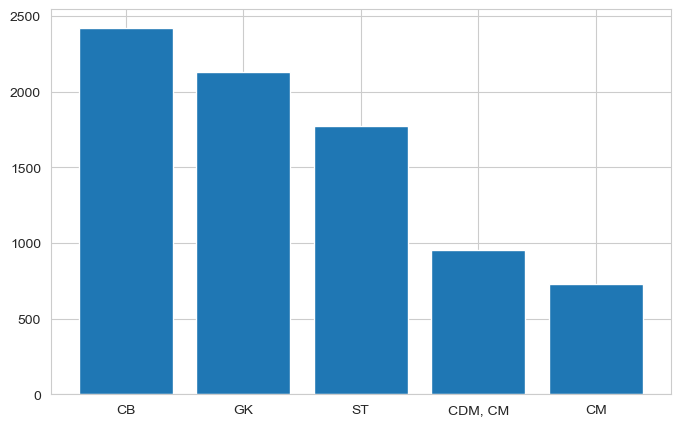

In [137]:
fig, ax = plt.subplots(figsize = (8,5))
plot_most_common('player_positions')
plt.show()

In [139]:
player_name = df[['wage_eur','short_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['wage_eur']).set_index('short_name')
player_name

,wage_eur,value_eur,overall,age,nationality_name,potential,international_reputation
short_name,,,,,,,
K. De Bruyne,350000.0,125500000.0,91,30,Belgium,91,4
K. Benzema,350000.0,66000000.0,89,33,France,89,4
L. Messi,320000.0,78000000.0,93,34,Argentina,93,5
Casemiro,310000.0,88000000.0,89,29,Brazil,89,3
T. Kroos,310000.0,75000000.0,88,31,Germany,88,4
R. Sterling,290000.0,107500000.0,88,26,England,89,4
R. Lewandowski,270000.0,119500000.0,92,32,Poland,92,5
Cristiano Ronaldo,270000.0,45000000.0,91,36,Portugal,91,5
Neymar Jr,270000.0,129000000.0,91,29,Brazil,91,5


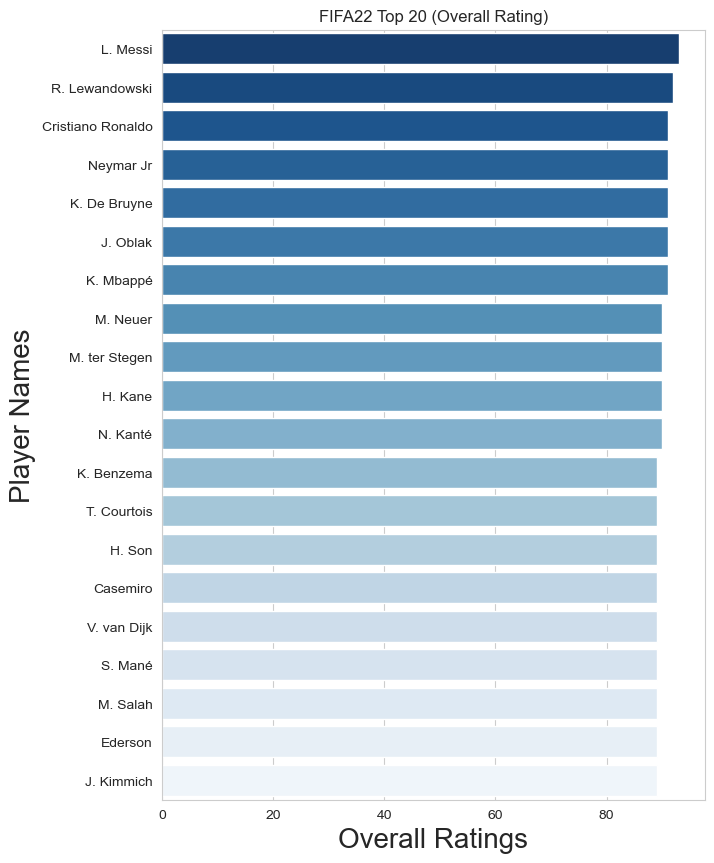

In [141]:
Overall = df["overall"]
footballer_name = df["short_name"]

# Let's create dataframe(Name,Overall)
data = pd.DataFrame({'short_name': footballer_name,'overall':Overall})

x = df['short_name'].head(20) 
y = df['overall'].head(20)

# plot
plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 20) 
plt.ylabel('Player Names', size = 20 ) 
plt.title('FIFA22 Top 20 (Overall Rating)')

plt.show()

# Title: Football Player Analysis

## Introduction
This notebook analyzes a dataset of football players to draw insights about their attributes, wages, and more. The data includes variables like players' mentality, foot preference, position, potential rating, and wages.

## Data Source
To understand how variables like players' mentality were measured, further investigation into the data source is needed.


## Conclusion
Based on the analysis, we can conclude that:


1. **Messi is the best player**.
2. **Kevin De Bruyne is currently the highest paid**.
3. **Majority of football players are right footed**.
4. **Majority of football players are centerbacks/central defenders**.
5. **There is generally a positive relationship between players' potential rating and wages**.
6. **However, among the top 15 players, this relationship is not consistent.**
7. **England has the most representation among countries in the data, followed by Germany**.
